In [56]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np    

In [57]:
def homerun():
    x = input("請輸入網址")
    x_1 = str(x)
    res = requests.get(x_1)
    soup = BeautifulSoup(res.text, "lxml")

    data = []
    data0 = []
    table = soup.find('table', attrs={'class':'stats_table'})
    table_body = table.find('tbody')
    k=["Age","Tm","Lg","G","PA","AB","R","H","2B","3B","HR","RBI","SB","CS","BB","SO","BA","OBP","SLG","OPS","OPS+","TB","GDP","HBP","SH","SF","IBB","Pos","Awards"]

    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols0 = row.find_all("th")
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele]) # Get rid of empty values
        cols0 = [ele0.text.strip() for ele0 in cols0]
        data0.append([ele0 for ele0 in cols0 if ele0]) # Get rid of empty values
    
    frame = pd.DataFrame(data,columns=k)
    frame0 = pd.DataFrame(data0,columns=["year"])

    frame_all_1 = pd.concat([frame0, frame], axis=1)
    print(frame_all_1)
    return frame_all_1

In [58]:
def clean(x): 
    frame_all_X = x
    frame_all_X = frame_all_X.drop(["year", "Tm", "Lg", "CS", "GDP", "HBP", "SH", "SF", "IBB", "Pos", "Awards","BA","OBP","SLG", "OPS"], axis=1)
    frame_all_X["Age"] = frame_all_X["Age"].astype("float")
    frame_all_X["G"] = frame_all_X["G"].astype("float")
    frame_all_X["PA"] = frame_all_X["PA"].astype("float")
    frame_all_X["AB"] = frame_all_X["AB"].astype("float")
    frame_all_X["R"] = frame_all_X["R"].astype("float")
    frame_all_X["H"] = frame_all_X["H"].astype("float")
    frame_all_X["3B"] = frame_all_X["3B"].astype("float")
    frame_all_X["2B"] = frame_all_X["2B"].astype("float")
    frame_all_X["RBI"] = frame_all_X["RBI"].astype("float")
    frame_all_X["SB"] = frame_all_X["SB"].astype("float")
    frame_all_X["BB"] = frame_all_X["BB"].astype("float")
    frame_all_X["SO"] = frame_all_X["SO"].astype("float")
    frame_all_X["TB"] = frame_all_X["TB"].astype("float")
    frame_all_X["OPS+"] = frame_all_X["OPS+"].astype("float")
    frame_all_X["HR"] = frame_all_X["HR"].astype("float")#總共15個比較項目
    return frame_all_X

In [59]:
def output_y(frame_all_X):    
    frame_all_Y = frame_all_X["HR"]#輸出
    frame_all_Y = frame_all_Y.astype("float")
    return frame_all_Y

In [60]:
Data_2 = homerun()

請輸入網址http://www.baseball-reference.com/players/c/crawfca02.shtml
    year Age       Tm         Lg    G   PA   AB    R    H  2B       ...        \
0   1999  17  TBD-min         Rk   60  278  260   62   83  14       ...         
1   2000  18  TBD-min          A  135  609  564   99  170  21       ...         
2   2001  19  TBD-min         AA  132  585  537   64  147  24       ...         
3   2002  20  TBD-min        AAA   85  383  353   59  105  17       ...         
4   2002  20      TBD         AL   63  278  259   23   67  11       ...         
5   2003  21      TBD         AL  151  661  630   80  177  18       ...         
6   2004  22      TBD         AL  152  672  626  104  185  26       ...         
7   2005  23      TBD         AL  156  687  644  101  194  33       ...         
8   2006  24      TBD         AL  151  653  600   89  183  20       ...         
9   2007  25      TBD         AL  143  627  584   93  184  37       ...         
10  2008  26      TBR         AL  109  482  

In [133]:
#4 5 6 7 8 9 10 11 12 14 16 18 20 22 24

In [61]:
#1.drop raw
Data_2 = Data_2.drop([0,1,2,3,13,15,17,19,21,23], axis=0)
Data_2

,year,Age,Tm,Lg,G,PA,AB,R,H,2B,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos,Awards
4,2002,20,TBD,AL,63,278,259,23,67,11,...,.661,77,96,0,3,6,1,0,7,None
5,2003,21,TBD,AL,151,661,630,80,177,18,...,.671,81,228,5,1,1,3,4,*78/D,None
6,2004,22,TBD,AL,152,672,626,104,185,26,...,.781,105,282,2,1,4,6,2,*78/D,AS
7,2005,23,TBD,AL,156,687,644,101,194,33,...,.800,112,302,11,5,5,6,1,*7/8D,None
8,2006,24,TBD,AL,151,653,600,89,183,20,...,.830,113,289,8,4,9,2,3,*7/D8,MVP-26
9,2007,25,TBD,AL,143,627,584,93,184,37,...,.820,117,272,11,5,1,2,5,*7/D,AS
10,2008,26,TBR,AL,109,482,443,69,121,12,...,.718,89,177,10,2,0,5,1,7/8D,None
11,2009,27,TBR,AL,156,672,606,96,185,28,...,.816,116,274,7,8,2,5,1,*7/D,AS
12,2010,28,TBR,AL,154,663,600,110,184,30,...,.851,135,297,2,3,3,5,3,*7/D,"AS,MVP-7,GG,SS"
14,2011,29,BOS,AL,130,539,506,65,129,29,...,.694,85,205,7,3,2,4,1,*7/D,None


In [62]:
#2.用clean函數把MLB的資料抓出來
X_2_origin = clean(Data_2) #floot
X_2_origin

,Age,G,PA,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,OPS+,TB
4,20.0,63.0,278.0,259.0,23.0,67.0,11.0,6.0,2.0,30.0,9.0,9.0,41.0,77.0,96.0
5,21.0,151.0,661.0,630.0,80.0,177.0,18.0,9.0,5.0,54.0,55.0,26.0,102.0,81.0,228.0
6,22.0,152.0,672.0,626.0,104.0,185.0,26.0,19.0,11.0,55.0,59.0,35.0,81.0,105.0,282.0
7,23.0,156.0,687.0,644.0,101.0,194.0,33.0,15.0,15.0,81.0,46.0,27.0,84.0,112.0,302.0
8,24.0,151.0,653.0,600.0,89.0,183.0,20.0,16.0,18.0,77.0,58.0,37.0,85.0,113.0,289.0
9,25.0,143.0,627.0,584.0,93.0,184.0,37.0,9.0,11.0,80.0,50.0,32.0,112.0,117.0,272.0
10,26.0,109.0,482.0,443.0,69.0,121.0,12.0,10.0,8.0,57.0,25.0,30.0,60.0,89.0,177.0
11,27.0,156.0,672.0,606.0,96.0,185.0,28.0,8.0,15.0,68.0,60.0,51.0,99.0,116.0,274.0
12,28.0,154.0,663.0,600.0,110.0,184.0,30.0,13.0,19.0,90.0,47.0,46.0,104.0,135.0,297.0
14,29.0,130.0,539.0,506.0,65.0,129.0,29.0,7.0,11.0,56.0,18.0,23.0,104.0,85.0,205.0


In [63]:
#3.做y
Y_2_origin = output_y(X_2_origin)
Y_2_origin

4      2.0
5      5.0
6     11.0
7     15.0
8     18.0
9     11.0
10     8.0
11    15.0
12    19.0
14    11.0
16     3.0
18     6.0
20     8.0
22     4.0
24     0.0
Name: HR, dtype: float64

In [65]:
#4.把訓練跟測試資料分好
X_2_finish = X_2_origin.values
num = Y_2_origin.count()
x_2_train = X_2_finish[:10]#最後一個不要[0:10]
x_2_test = X_2_finish[10:num-1]#[10:num-1]
Y_2_finish = Y_2_origin.values
y_2_train = Y_2_finish[1:11]#[1:11]
y_2_test = Y_2_finish[11:num]#最前一個不要，[11:num]

In [54]:
len(x_2_test)

4

In [66]:
Data_1 = homerun()#Vinny Castilla

請輸入網址http://www.baseball-reference.com/players/c/castivi02.shtml
    year                                              Age       Tm       Lg  \
0   1987                                               19      SLT      AAA   
1   1987  Did not play in major or minor leagues (Mexico)     None     None   
2   1988                                               20  SLT,MVA      AAA   
3   1988  Did not play in major or minor leagues (Mexico)     None     None   
4   1989                                               21      SLT      AAA   
5   1989  Did not play in major or minor leagues (Mexico)     None     None   
6   1990                                               22  ATL-min     A,AA   
7   1991                                               23  ATL-min   AA,AAA   
8   1991                                               23      ATL       NL   
9   1992                                               24  ATL-min      AAA   
10  1992                                               24      ATL

In [196]:
#1,3,5,6,7,9,12,20,22,23,29,30

In [67]:
#drop raw
Data_1 = Data_1.drop([0,1,2,3,4,5,6,7,9,12,20,22,23,28,29,30], axis=0)
X_1_origin = clean(Data_1) #floot
Y_1_origin = output_y(X_1_origin)
X_1_finish = X_1_origin.values
num = Y_1_origin.count()
x_1_train = X_1_finish[:10]#最後一個不要[0:10]
x_1_test = X_1_finish[10:num-1]#[10:num-1]
Y_1_finish = Y_1_origin.values
y_1_train = Y_1_finish[1:11]#[1:11]
y_1_test = Y_1_finish[11:num]#最前一個不要，[11:num]

In [68]:
Data_3 = homerun()#Adam Dunn

請輸入網址http://www.baseball-reference.com/players/d/dunnad01.shtml
    year Age       Tm      Lg    G   PA   AB    R    H  2B   ...      OPS  \
0   1998  18  CIN-min      Rk   34  151  125   26   36   3   ...     .828   
1   1999  19  CIN-min       A   93  372  313   62   96  16   ...     .885   
2   2000  20  CIN-min       A  122  538  420  101  118  29   ...     .897   
3   2001  21  CIN-min  AAA,AA   94  422  350   74  117  22   ...    1.116   
4   2001  21      CIN      NL   66  286  244   54   64  18   ...     .948   
5   2002  22      CIN      NL  158  676  535   84  133  28   ...     .854   
6   2003  23      CIN      NL  116  469  381   70   82  12   ...     .819   
7   2004  24      CIN      NL  161  681  568  105  151  34   ...     .956   
8   2005  25      CIN      NL  160  671  543  107  134  35   ...     .927   
9   2006  26      CIN      NL  160  683  561   99  131  24   ...     .855   
10  2007  27      CIN      NL  152  632  522  101  138  27   ...     .940   
11  2008  28

In [205]:
#0,1,2,3,12,13,20,21

In [69]:
Data_3 = Data_3.drop([0,1,2,3,12,13,20,21], axis=0)
X_3_origin = clean(Data_3) #floot
Y_3_origin = output_y(X_3_origin)
X_3_finish = X_3_origin.values
num = Y_3_origin.count()
x_3_train = X_3_finish[:10]#最後一個不要[0:10]
x_3_test = X_3_finish[10:num-1]#[10:num-1]
Y_3_finish = Y_3_origin.values
y_3_train = Y_3_finish[1:11]#[1:11]
y_3_test = Y_3_finish[11:num]#最前一個不要，[11:num]

In [70]:
Data_4 = homerun()

請輸入網址http://www.baseball-reference.com/players/f/fieldpr01.shtml
    year Age       Tm       Lg    G   PA   AB    R    H  2B     ...       \
0   2002  18  MIL-min     Rk,A   73  317  258   50   84  19     ...        
1   2003  19  MIL-min        A  137  594  502   81  157  22     ...        
2   2004  20  MIL-min       AA  135  577  497   70  135  29     ...        
3   2005  21  MIL-min  AAA,Fal  109  465  399   73  113  22     ...        
4   2005  21      MIL       NL   39   62   59    2   17   4     ...        
5   2006  22      MIL       NL  157  648  569   82  154  35     ...        
6   2007  23      MIL       NL  158  681  573  109  165  35     ...        
7   2008  24      MIL       NL  159  694  588   86  162  30     ...        
8   2009  25      MIL       NL  162  719  591  103  177  35     ...        
9   2010  26      MIL       NL  161  714  578   94  151  25     ...        
10  2011  27      MIL       NL  162  692  569   95  170  36     ...        
11  2012  28      DET  

In [214]:
# 0,1,2,3,15

In [71]:
Data_4 = Data_4.drop([0,1,2,3], axis=0)
X_4_origin = clean(Data_4) #floot
Y_4_origin = output_y(X_4_origin)
X_4_finish = X_4_origin.values
num = Y_4_origin.count()
x_4_train = X_4_finish[:10]#最後一個不要[0:10]
x_4_test = X_4_finish[10:num-1]#[10:num-1]
Y_4_finish = Y_4_origin.values
y_4_train = Y_4_finish[1:11]#[1:11]
y_4_test = Y_4_finish[11:num]#最前一個不要，[11:num]

In [72]:
Data_5 = homerun()

請輸入網址http://www.baseball-reference.com/players/g/gonzaju03.shtml
    year Age       Tm   Lg    G   PA   AB    R    H  2B     ...         OPS  \
0   1986  16  TEX-min   Rk   60  259  233   24   56   4     ...        .568   
1   1987  17  TEX-min    A  127  549  509   69  135  21     ...        .707   
2   1988  18  TEX-min    A   77  308  277   25   71  14     ...        .740   
3   1989  19  TEX-min   AA  133  547  502   73  147  30     ...        .848   
4   1989  19      TEX   AL   24   68   60    6    9   3     ...        .477   
5   1990  20  TEX-min  AAA  128  537  496   78  128  29     ...        .808   
6   1990  20      TEX   AL   25   95   90   11   26   7     ...        .838   
7   1991  21      TEX   AL  142  595  545   78  144  34     ...        .800   
8   1992  22      TEX   AL  155  632  584   77  152  24     ...        .833   
9   1993  23      TEX   AL  140  587  536  105  166  33     ...       1.000   
10  1994  24      TEX   AL  107  463  422   57  116  18     ...   

In [ ]:
# 0,1,2,3,5,20,22

In [73]:
Data_5 = Data_5.drop([0,1,2,3,5,20,22], axis=0)
X_5_origin = clean(Data_5) #floot
Y_5_origin = output_y(X_5_origin)
X_5_finish = X_5_origin.values
num = Y_5_origin.count()
x_5_train = X_5_finish[:10]#最後一個不要[0:10]
x_5_test = X_5_finish[10:num-1]#[10:num-1]
Y_5_finish = Y_5_origin.values
y_5_train = Y_5_finish[1:11]#[1:11]
y_5_test = Y_5_finish[11:num]#最前一個不要，[11:num]

In [75]:
Data_6 = homerun()#Derrek Lee

請輸入網址http://www.baseball-reference.com/players/l/leede02.shtml
    year Age       Tm     Lg    G   PA   AB    R    H  2B       ...        \
0   1993  17  SDP-min  A+,Rk   35  142  125   24   37   6       ...         
1   1994  18  SDP-min     A+  126  497  442   66  118  19       ...         
2   1995  19  SDP-min  A+,AA  130  574  511   82  152  25       ...         
3   1996  20  SDP-min     AA  134  575  500   98  140  39       ...         
4   1997  21  SDP-min    AAA  125  534  472   86  153  29       ...         
5   1997  21      SDP     NL   22   63   54    9   14   3       ...         
6   1998  22      FLA     NL  141  513  454   62  106  29       ...         
7   1999  23  FLA-min    AAA   89  377  339   60   96  20       ...         
8   1999  23      FLA     NL   70  236  218   21   45   9       ...         
9   2000  24      FLA     NL  158  546  477   70  134  18       ...         
10  2001  25      FLA     NL  158  625  561   83  158  37       ...         
11  2002  26 

In [231]:
#0,1,2,3,4,7,15,21,22,23,25,26

In [76]:
Data_6 = Data_6.drop([0,1,2,3,4,7,15,21,22,23,25,26], axis=0)
X_6_origin = clean(Data_6) #floot
Y_6_origin = output_y(X_6_origin)
X_6_finish = X_6_origin.values
num = Y_6_origin.count()
x_6_train = X_6_finish[:10]#最後一個不要[0:10]
x_6_test = X_6_finish[10:num-1]#[10:num-1]
Y_6_finish = Y_6_origin.values
y_6_train = Y_6_finish[1:11]#[1:11]
y_6_test = Y_6_finish[11:num]#最前一個不要，[11:num]

In [77]:
Data_7 = homerun()#Carlos Peña

請輸入網址http://www.baseball-reference.com/players/p/penaca01.shtml
    year Age           Tm       Lg    G   PA   AB    R    H  2B    ...     \
0   1998  20      TEX-min  A,A+,Rk   39  163  144   24   46  15    ...      
1   1999  21      TEX-min       A+  136  597  501   85  128  31    ...      
2   2000  22      TEX-min       AA  138  648  529  117  158  36    ...      
3   2001  23      TEX-min      AAA  119  519  431   71  124  38    ...      
4   2001  23          TEX       AL   22   72   62    6   16   4    ...      
5   2002  24      OAK-min      AAA   44  206  175   30   42  10    ...      
6   2002  24          TOT       AL  115  443  397   43   96  17    ...      
7   2002  24          OAK       AL   40  141  124   12   27   4    ...      
8   2002  24          DET       AL   75  302  273   31   69  13    ...      
9   2003  25      DET-min      AAA    8   35   30    4   10   4    ...      
10  2003  25          DET       AL  131  516  452   51  112  21    ...      
11  2004  26

In [238]:
#0,1,2,3,5,9,12,14,17,20,24,28

In [78]:
Data_7 = Data_7.drop([0,1,2,3,5,7,8,9,12,14,17,20,24,26,27,28], axis=0)
X_7_origin = clean(Data_7) #floot
Y_7_origin = output_y(X_7_origin)
X_7_finish = X_7_origin.values
num = Y_7_origin.count()
x_7_train = X_7_finish[:10]#最後一個不要[0:10]
x_7_test = X_7_finish[10:num-1]#[10:num-1]
Y_7_finish = Y_7_origin.values
y_7_train = Y_7_finish[1:11]#[1:11]
y_7_test = Y_7_finish[11:num]#最前一個不要，[11:num]

In [79]:
Data_8 = homerun()#Ken Griffey

請輸入網址http://www.baseball-reference.com/players/g/griffke02.shtml
    year Age       Tm    Lg    G   PA   AB    R    H  2B       ...         \
0   1987  17  SEA-min    A-   54  228  182   43   57   9       ...          
1   1988  18  SEA-min  A,AA   75  324  280   60   91  18       ...          
2   1989  19      SEA    AL  127  506  455   61  120  23       ...          
3   1990  20      SEA    AL  155  666  597   91  179  28       ...          
4   1991  21      SEA    AL  154  633  548   76  179  42       ...          
5   1992  22      SEA    AL  142  617  565   83  174  39       ...          
6   1993  23      SEA    AL  156  691  582  113  180  38       ...          
7   1994  24      SEA    AL  111  493  433   94  140  24       ...          
8   1995  25  SEA-min   AAA    1    3    3    0    0   0       ...          
9   1995  25      SEA    AL   72  314  260   52   67   7       ...          
10  1996  26      SEA    AL  140  638  545  125  165  26       ...          
11  1997  2

In [243]:
#0,1,8,23,24

In [80]:
Data_8 = Data_8.drop([0,1,8,23,24], axis=0)
X_8_origin = clean(Data_8) #floot
Y_8_origin = output_y(X_8_origin)
X_8_finish = X_8_origin.values
num = Y_8_origin.count()
x_8_train = X_8_finish[:10]#最後一個不要[0:10]
x_8_test = X_8_finish[10:num-1]#[10:num-1]
Y_8_finish = Y_8_origin.values
y_8_train = Y_8_finish[1:11]#[1:11]
y_8_test = Y_8_finish[11:num]#最前一個不要，[11:num]

In [81]:
Data_9 = homerun()#Ryan Howard

請輸入網址http://www.baseball-reference.com/players/h/howarry01.shtml
    year Age       Tm          Lg    G   PA   AB    R    H  2B     ...       \
0   2001  21  PHI-min          A-   48  203  169   26   46   7     ...        
1   2002  22  PHI-min           A  135  570  493   56  138  20     ...        
2   2003  23  PHI-min          A+  130  553  490   67  149  32     ...        
3   2004  24  PHI-min  AA,AAA,Fal  131  560  485   94  141  28     ...        
4   2004  24      PHI          NL   19   42   39    5   11   5     ...        
5   2005  25  PHI-min         AAA   61  257  210   38   78  19     ...        
6   2005  25      PHI          NL   88  348  312   52   90  17     ...        
7   2006  26      PHI          NL  159  704  581  104  182  25     ...        
8   2007  27  PHI-min           A    2    8    6    1    2   1     ...        
9   2007  27      PHI          NL  144  648  529   94  142  26     ...        
10  2008  28      PHI          NL  162  700  610  105  153  26    

In [82]:
#0,1,2,3,5,8,12,15,21

In [83]:
Data_9 = Data_9.drop([0,1,2,3,5,8,12,15,21], axis=0)
X_9_origin = clean(Data_9) #floot
Y_9_origin = output_y(X_9_origin)
X_9_finish = X_9_origin.values
num = Y_9_origin.count()
x_9_train = X_9_finish[:10]#最後一個不要[0:10]
x_9_test = X_9_finish[10:num-1]#[10:num-1]
Y_9_finish = Y_9_origin.values
y_9_train = Y_9_finish[1:11]#[1:11]
y_9_test = Y_9_finish[11:num]#最前一個不要，[11:num]

In [84]:
x_train = np.concatenate((x_1_train, x_2_train,x_3_train,x_4_train,x_5_train,x_6_train,x_7_train,x_8_train,x_9_train))
y_train = np.concatenate((y_1_train, y_2_train,y_3_train,y_4_train,y_5_train,y_6_train,y_7_train,y_8_train,y_9_train))
x_test = np.concatenate((x_1_test, x_2_test,x_3_test,x_4_test,x_5_test,x_6_test,x_7_test,x_8_test,x_9_test))
y_test = np.concatenate((y_1_test, y_2_test,y_3_test,y_4_test,y_5_test,y_6_test,y_7_test,y_8_test,y_9_test))

In [113]:
len(x_test)

44

(array([ 12.,  16.,  20.,  15.,  23.,   4.]),
 array([ 0, 10, 20, 30, 40, 50, 60]),
 <a list of 6 Patch objects>)

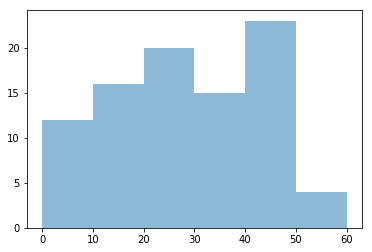

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
bins = np.arange(0, 70,10)
plt.hist(y_train, bins = bins, alpha = 0.5)

In [110]:
#輸出這邊我將資料分成群
y_train[y_train<15] = 0
y_train[(y_train>=15) & (y_train<25)] = 1
y_train[(y_train>=25) & (y_train<35)] = 2
y_train[(y_train>=35) & (y_train<45)] = 3
y_train[(y_train>=45)] = 4

In [111]:
y_test[y_test<15] = 0
y_test[(y_test>=15) & (y_test<25)] = 1
y_test[(y_test>=25) & (y_test<35)] = 2
y_test[(y_test>=35) & (y_test<45)] = 3
y_test[(y_test>=45)] = 4

In [112]:
from keras.utils import np_utils
y_train_trans = np_utils.to_categorical(y_train,5)
y_test_trans = np_utils.to_categorical(y_test,5)

Using TensorFlow backend.


In [114]:
X = np.reshape(x_train,(90,15,1))
X_test = np.reshape(x_test,(44,15,1))

In [143]:
#可以從這邊開始讀起
np.savetxt('X.csv', X, delimiter=',')
np.savetxt('X_test.csv', X_test, delimiter=',')
np.savetxt('y_train_trans.csv', y_train_trans, delimiter=',')
np.savetxt('y_test_trans.csv', y_test_trans, delimiter=',')

In [150]:
X = np.loadtxt('X.csv', delimiter=',')
X_test = np.loadtxt('X_test.csv', delimiter=',')
y_train_trans = np.loadtxt('y_train_trans.csv', delimiter=',')
y_test_trans = np.loadtxt('y_test_trans.csv', delimiter=',')

In [157]:
X = np.reshape(X,(90,15,1))
X_test = np.reshape(X_test,(44,15,1))

In [160]:
from keras.models import Sequential
from keras.layers import Dense,Activation, LSTM, Dropout
from keras.optimizers import SGD
model = Sequential()
model.add(LSTM(256, activation="sigmoid", input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y_train_trans.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 1285      
Total params: 265,477
Trainable params: 265,477
Non-trainable params: 0
_________________________________________________________________


In [161]:
model.fit(X,y_train_trans,batch_size=30, epochs=100, validation_data=(X_test, y_test_trans))

Train on 90 samples, validate on 44 samples
Epoch 1/100
90/90 [==============================] - 1s - loss: 1.6813 - acc: 0.2111 - val_loss: 1.6078 - val_acc: 0.0909
Epoch 2/100
90/90 [==============================] - 0s - loss: 1.6066 - acc: 0.2556 - val_loss: 1.5508 - val_acc: 0.1591
Epoch 3/100
90/90 [==============================] - 0s - loss: 1.5777 - acc: 0.2333 - val_loss: 1.5421 - val_acc: 0.1818
Epoch 4/100
90/90 [==============================] - 0s - loss: 1.5950 - acc: 0.2667 - val_loss: 1.5622 - val_acc: 0.2045

In [137]:
score = model.evaluate(X_test, y_test_trans, verbose=0)

In [148]:
result = model.predict(X_test)

ValueError: Error when checking : expected lstm_7_input to have 3 dimensions, but got array with shape (44, 15)

In [149]:
from ipywidgets import interact_manual
def identify(testnumber):
    print("神經網路判斷為：",result[testnumber])
    print("正確答案是:",y_test_trans[testnumber])
interact_manual(identify, testnumber=(0,44))

<function __main__.identify>